In [1]:
import pandas as pd
df = pd.read_csv("Tweets.csv")

In [2]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [3]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [4]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [5]:
review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [6]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [7]:
tweet = review_df.text.values

In [8]:
pip install --user --upgrade tensorflow numpy

  Using cached numpy-2.0.1-cp39-cp39-win_amd64.whl (16.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

In [11]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [13]:
vocab_size = len(tokenizer.word_index) + 1

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
maxlen= 200  # Define the maximum sequence length

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 44s 134ms/step - accuracy: 0.7809 - loss: 0.5279 - val_accuracy: 0.8913 - val_loss: 0.2530
Epoch 2/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 118ms/step - accuracy: 0.8729 - loss: 0.3031 - val_accuracy: 0.9168 - val_loss: 0.1994
Epoch 3/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 33s 116ms/step - accuracy: 0.9178 - loss: 0.2149 - val_accuracy: 0.9160 - val_loss: 0.1963
Epoch 4/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 42s 118ms/step - accuracy: 0.9343 - loss: 0.1828 - val_accuracy: 0.9164 - val_loss: 0.1998
Epoch 5/5
289/289 ━━━━━━━━━━━━━━━━━━━━ 33s 114ms/step - accuracy: 0.9450 - loss: 0.1445 - val_accuracy: 0.9190 - val_loss: 0.2123


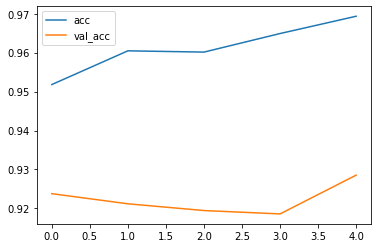

<Figure size 432x288 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

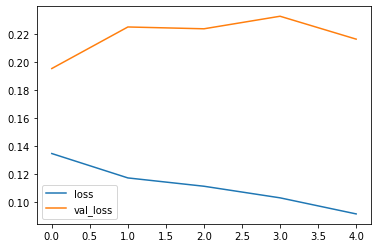

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [19]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
Predicted label:  positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted label:  negative


In [21]:
text_examples = [
    "I love this product! It's amazing.",
    "This movie was so disappointing.",
    "The news of her success brought tears of joy to my eyes.",
    "The sight of puppies always brings a smile to my face.",
    "I'm overwhelmed by the amount of work I have to do.",
    "I can't shake off this feeling of loneliness.",
    "The breathtaking view from the mountaintop filled me with awe.",
    "Sheer determination got me through the toughest times.",
    "The warm embrace of a loved one brings me comfort.",
    "The unexpected surprise made my day.",
    "I'm feeling anxious about the upcoming exam.",
    "The serene beauty of the sunset calms my mind.",
    "His generosity fills me with gratitude.",
    "The thought of failure fills me with dread.",
    "I'm excited to start this new chapter in my life.",
    
]

for example in text_examples:
    predicted_sentiment = predict_sentiment(example)
    print("Text:", example)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted label:  positive
Text: I love this product! It's amazing.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Predicted label:  negative
Text: This movie was so disappointing.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predicted label:  positive
Text: The news of her success brought tears of joy to my eyes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted label:  positive
Text: The sight of puppies always brings a smile to my face.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted label:  negative
Text: I'm overwhelmed by the amount of work I have to do.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted label:  negative
Text: I can't shake off this feeling of loneliness.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted label:  positive
Text: The breathtaking view from the mountaintop filled me with awe.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted label:  positive
Text: Sheer determination got me through the toughest times.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/ste